# Data exploration

The notebook presents the preprocessed satellite data with general data exploration techniques.

In [6]:
import os
print(os.getcwd())
from os import path
import pandas
import numpy as np
from matplotlib import pyplot as plt
import random
import sys

sys.path.append(os.path.abspath("src/utils"))
import toolbox
os.environ["PROJ_LIB"] = "C:\\Utilities\\Python\\Anaconda\\Library\\share"; #fixr

/application/pi/S3-clustering


KeyError: 'PROJ_LIB'

## Loading preprocessed data

In [2]:
df = toolbox.load_data()

NameError: name 'toolbox' is not defined

## Exploring fields

Number of rows.

In [3]:
len(df)

1232933

The preprocessing step already removed name fields from the NetCDF files. Only the fields useful for the study are present.

In [4]:
list(df.columns.values)

['time_01',
 'lat_01',
 'lon_01',
 'tb_238_01',
 'tb_365_01',
 'ice_sheet_snow_facies_flag_01_ku',
 'sig0_ice_sheet_01_ku',
 'sig0_ice_sheet_01_c',
 'sig0_leading_edge_ice_20_ku',
 'width_leading_edge_ice_20_ku',
 'slope_first_trailing_edge_ice_20_ku',
 'slope_second_trailing_edge_ice_20_ku',
 'peakiness_1_20_ku',
 'peakiness_2_20_ku',
 'waveform_qual_ice_20_ku',
 'sig0_leading_edge_ice_20_c',
 'width_leading_edge_ice_20_c',
 'slope_first_trailing_edge_ice_20_c',
 'slope_second_trailing_edge_ice_20_c',
 'peakiness_1_20_c',
 'peakiness_2_20_c',
 'sig0_leading_edge_ice_20_plrm_ku',
 'width_leading_edge_ice_20_plrm_ku',
 'slope_first_trailing_edge_ice_20_plrm_ku',
 'slope_second_trailing_edge_ice_20_plrm_ku',
 'peakiness_1_20_plrm_ku',
 'waveform_20_ku_0',
 'waveform_20_ku_1',
 'waveform_20_ku_2',
 'waveform_20_ku_3',
 'waveform_20_ku_4',
 'waveform_20_ku_5',
 'waveform_20_ku_6',
 'waveform_20_ku_7',
 'waveform_20_ku_8',
 'waveform_20_ku_9',
 'waveform_20_ku_10',
 'waveform_20_ku_11',
 'w

Quick statistics about the data.

In [5]:
df.describe()

,time_01,lat_01,lon_01,tb_238_01,tb_365_01,ice_sheet_snow_facies_flag_01_ku,sig0_ice_sheet_01_ku,sig0_ice_sheet_01_c,sig0_leading_edge_ice_20_ku,width_leading_edge_ice_20_ku,...,waveform_20_c_122,waveform_20_c_123,waveform_20_c_124,waveform_20_c_125,waveform_20_c_126,waveform_20_c_127,cycle,tb_ratio,tb_avg,ku_c_diff
count,1.232933e+06,1.232933e+06,1.232933e+06,1.232933e+06,1.232933e+06,1.232933e+06,1.232933e+06,1.232933e+06,20096.000000,20096.000000,...,1.232933e+06,1.232933e+06,1.232933e+06,1.232933e+06,1.232933e+06,1.232933e+06,1.232933e+06,1.232933e+06,1.232933e+06,1.232933e+06
mean,5.691347e+08,7.561237e+01,-4.223084e+01,1.916792e+02,1.959356e+02,3.955298e+00,4.502913e+01,1.144668e+01,12.084959,2.244038,...,1.586348e+02,1.526694e+02,1.438739e+02,1.302665e+02,1.138850e+02,9.487777e+01,2.635289e+01,-1.192533e-02,1.938074e+02,3.358245e+01
std,3.384160e+07,5.030939e+00,1.076407e+01,2.455596e+01,2.176460e+01,1.636869e+00,8.390144e+00,5.482743e+00,5.152558,1.866472,...,5.663220e+02,7.001055e+02,6.350284e+02,3.631876e+02,3.230529e+02,1.930398e+02,1.450947e+01,2.115678e-02,2.285584e+01,5.940150e+00
min,5.101552e+08,5.998355e+01,-7.202110e+01,1.361500e+02,1.345200e+02,1.000000e+00,-2.143000e+01,-2.282667e+01,-7.790000,0.047000,...,9.400000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-6.625102e-02,1.371950e+02,-2.797150e+01
25%,5.404027e+08,7.243992e+01,-4.939208e+01,1.738300e+02,1.801300e+02,2.000000e+00,4.196455e+01,8.970000e+00,8.960000,0.937000,...,9.564500e+01,9.136800e+01,8.541900e+01,7.703600e+01,6.647800e+01,5.422100e+01,1.400000e+01,-2.730305e-02,1.771400e+02,3.269250e+01
50%,5.678754e+08,7.708629e+01,-4.247120e+01,1.872600e+02,1.926800e+02,4.000000e+00,4.720600e+01,1.303421e+01,13.250000,1.639000,...,1.335180e+02,1.277550e+02,1.195260e+02,1.079660e+02,9.354500e+01,7.672300e+01,2.600000e+01,-1.251656e-02,1.899650e+02,3.431250e+01
75%,5.975110e+08,7.975660e+01,-3.444526e+01,2.042400e+02,2.067500e+02,5.000000e+00,5.033350e+01,1.535700e+01,15.960000,2.904000,...,1.830000e+02,1.755440e+02,1.646360e+02,1.493940e+02,1.301470e+02,1.079200e+02,3.900000e+01,1.294469e-03,2.052250e+02,3.576500e+01
max,6.307092e+08,8.142859e+01,-1.258030e+01,2.767300e+02,2.780400e+02,6.000000e+00,8.120000e+01,3.541500e+01,39.930000,8.151000,...,3.338526e+05,5.482218e+05,4.042371e+05,2.051146e+05,2.424507e+05,9.877282e+04,5.300000e+01,1.376324e-01,2.773850e+02,9.734000e+01


The preprocessing removes all rows where the basics fields (time, lon/lat, tb, sig0_kua and snow_facies_flag) are set to NaN.

But other fields might have invalid data.

In [6]:
df.isnull().sum(axis = 0)

time_01              0
lat_01               0
lon_01               0
tb_238_01            0
tb_365_01            0
                    ..
waveform_20_c_127    0
cycle                0
tb_ratio             0
tb_avg               0
ku_c_diff            0
Length: 286, dtype: int64

We are particularly interested in the snow_facies_flag.

The cell below shows for which column data is available for each group.

In [7]:
df.groupby("ice_sheet_snow_facies_flag_01_ku").count()

,time_01,lat_01,lon_01,tb_238_01,tb_365_01,sig0_ice_sheet_01_ku,sig0_ice_sheet_01_c,sig0_leading_edge_ice_20_ku,width_leading_edge_ice_20_ku,slope_first_trailing_edge_ice_20_ku,...,waveform_20_c_122,waveform_20_c_123,waveform_20_c_124,waveform_20_c_125,waveform_20_c_126,waveform_20_c_127,cycle,tb_ratio,tb_avg,ku_c_diff
ice_sheet_snow_facies_flag_01_ku,,,,,,,,,,,,,,,,,,,,,
1,123443,123443,123443,123443,123443,123443,123443,731,731,730,...,123443,123443,123443,123443,123443,123443,123443,123443,123443,123443
2,190305,190305,190305,190305,190305,190305,190305,6082,6082,6082,...,190305,190305,190305,190305,190305,190305,190305,190305,190305,190305
3,121318,121318,121318,121318,121318,121318,121318,1298,1298,1297,...,121318,121318,121318,121318,121318,121318,121318,121318,121318,121318
4,228344,228344,228344,228344,228344,228344,228344,2449,2449,2448,...,228344,228344,228344,228344,228344,228344,228344,228344,228344,228344
5,321903,321903,321903,321903,321903,321903,321903,6241,6241,6241,...,321903,321903,321903,321903,321903,321903,321903,321903,321903,321903
6,247620,247620,247620,247620,247620,247620,247620,3295,3295,3295,...,247620,247620,247620,247620,247620,247620,247620,247620,247620,247620


Waveform data is also available. Let's see some samples.

In [8]:
waveforms_ku = np.array(df[["waveform_20_ku_%d" % i for i in range(128)]].dropna())

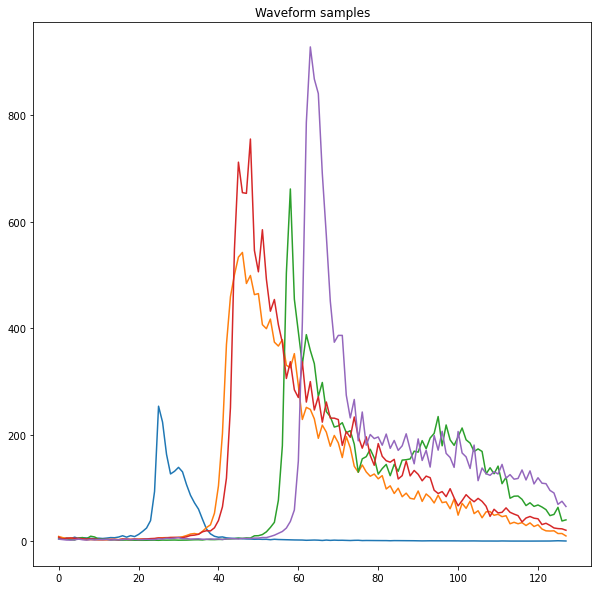

In [9]:
plt.figure(figsize=(10, 10))
plt.title("Waveform samples")
plt.plot(waveforms_ku[0])
plt.plot(waveforms_ku[10000])
plt.plot(waveforms_ku[20000])
plt.plot(waveforms_ku[30000])
plt.plot(waveforms_ku[40000])
plt.show()

The mean wave

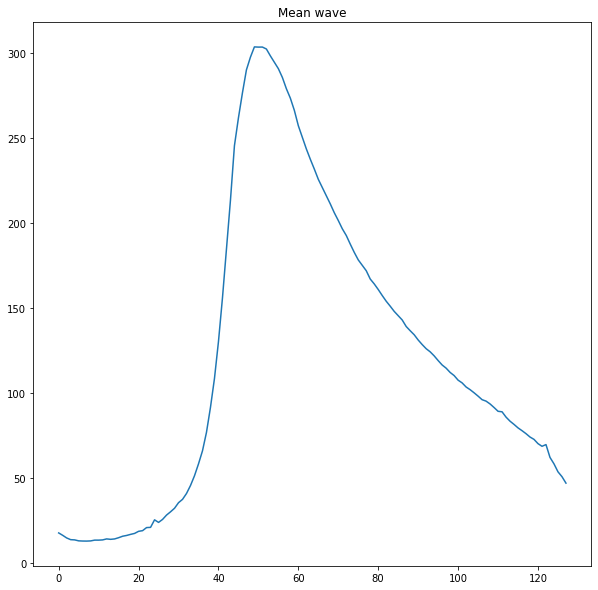

In [10]:
plt.figure(figsize=(10, 10))
plt.title("Mean wave")
plt.plot(waveforms_ku.mean(axis=0))
plt.show()

The samples show a varying amplitude. Let's plot the norm of the waveform as an histogram.

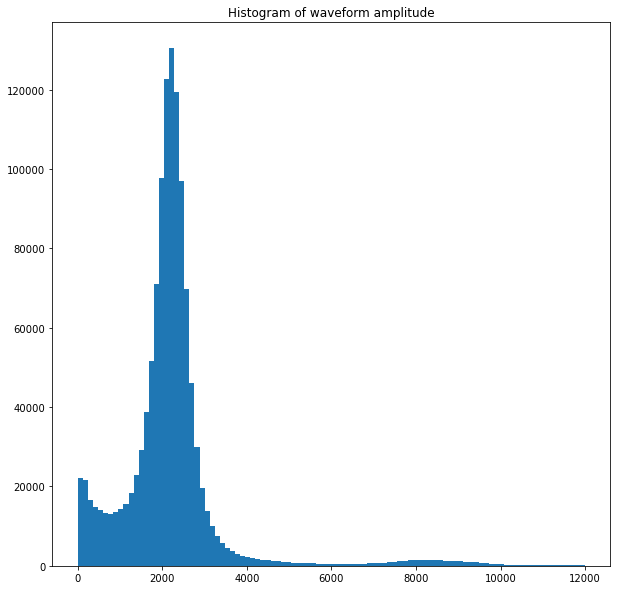

In [11]:
plt.figure(figsize=(10, 10))
plt.title("Histogram of waveform amplitude")
plt.hist(np.linalg.norm(waveforms_ku, axis=1), range=(0, 12000),  bins=100)
plt.show()

Waveforms have an amplitude that varies a lot. Plotting the normalized waveform will help gain insight into the shape of the waves.

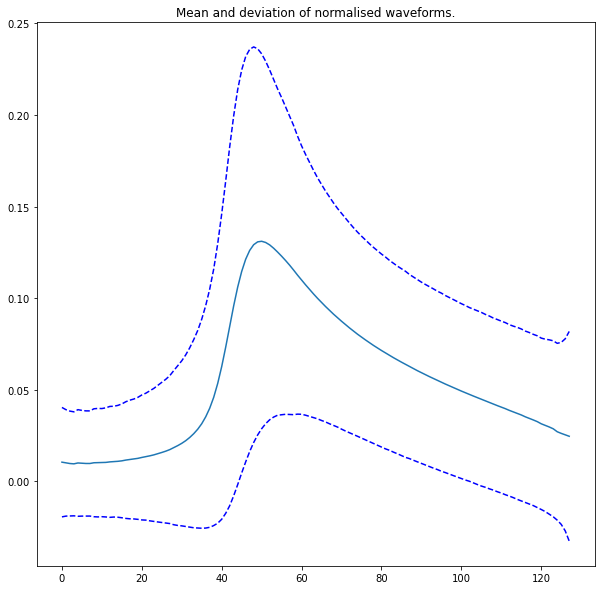

In [12]:
wave_norm = (waveforms_ku.T / np.linalg.norm(waveforms_ku, axis=1)).T
wave_mean = wave_norm.mean(axis=0)
wave_std = wave_norm.std(axis=0)
plt.figure(figsize=(10, 10))
plt.title("Mean and deviation of normalised waveforms.")
plt.plot(wave_mean)
plt.plot(wave_mean - wave_std, "b--")
plt.plot(wave_mean + wave_std, "b--")
plt.show()

Or as a boxplot:

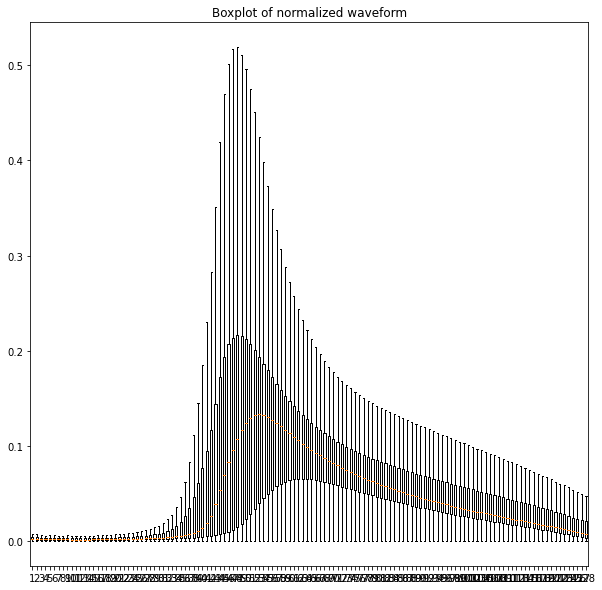

In [13]:
plt.figure(figsize=(10, 10))
plt.title("Boxplot of normalized waveform")
plt.boxplot(wave_norm, showfliers=False)
plt.show()

## Visualisations

### Dataset TSNE

T-stochastic Neighbourg Embedding is a useful tool to visualise high dimension data in 2D.


In [14]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

Sampling a small sample for faster computing.

In [15]:
sample1000 = df.sample(n=1000)

TSNE visualisation for the metrics from the original classification.

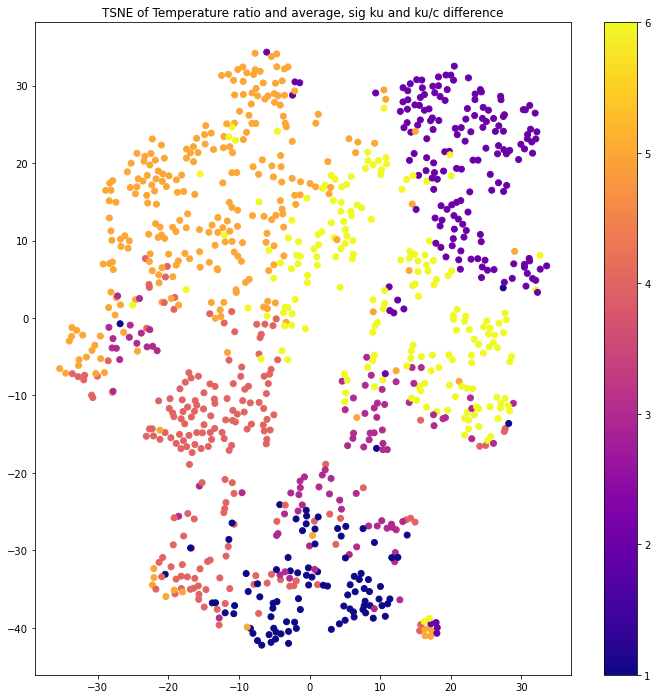

In [16]:
sample1000_filtered = sample1000[[
    "tb_ratio", "tb_avg", "sig0_ice_sheet_01_ku", "ku_c_diff"
]]
sample1000_filtered = (sample1000_filtered - sample1000_filtered.mean()) / sample1000_filtered.std()

data_emb = TSNE(random_state=42).fit_transform(sample1000_filtered)

plt.figure(figsize=(12, 12))
plt.title("TSNE of Temperature ratio and average, sig ku and ku/c difference")
plt.scatter(data_emb[:, 1], data_emb[:, 0], c=sample1000["ice_sheet_snow_facies_flag_01_ku"], cmap=plt.cm.plasma)
plt.colorbar()
plt.show()

TSNE visualisation for the original metrics and plrm waveform parameters. 

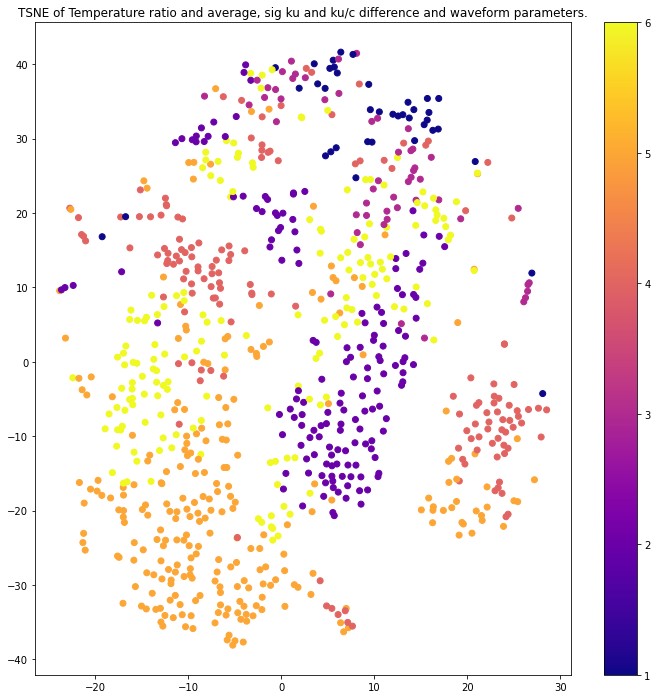

In [17]:
sample1000_filtered = sample1000[[
    "tb_ratio", "tb_avg", "sig0_ice_sheet_01_ku", "ku_c_diff", "sig0_leading_edge_ice_20_plrm_ku",
    "width_leading_edge_ice_20_plrm_ku", "slope_first_trailing_edge_ice_20_plrm_ku",
    "slope_second_trailing_edge_ice_20_plrm_ku", "peakiness_1_20_plrm_ku"
]].dropna()

sample1000_filtered = (sample1000_filtered - sample1000_filtered.mean()) / sample1000_filtered.std()

data_emb = TSNE(random_state=42).fit_transform(sample1000_filtered)

plt.figure(figsize=(12, 12))
plt.title("TSNE of Temperature ratio and average, sig ku and ku/c difference and waveform parameters.")
plt.scatter(data_emb[:, 1], data_emb[:, 0], c=sample1000["ice_sheet_snow_facies_flag_01_ku"].loc[sample1000_filtered.index.values], cmap=plt.cm.plasma)
plt.colorbar()
plt.show()

### Class caracterisation

It is usefull to explore each classe for each parameter. The plots below show histograms for each field for each group and the full data.

In [18]:
grouped_by_class = df.groupby("ice_sheet_snow_facies_flag_01_ku")

In [19]:
def histbygroup(field, df_all, grouped, range=None, bins=100):
    """Displays histogram for total data and data grouped per class for a given field."""
    plt.figure(figsize=(12, 12))
    plt.title("Histogram per group for field %s" % field)
    plt.hist(df_all[field].dropna(), bins=bins, range=range)
    legends = ["All"]
    for name, group in grouped:
        plt.hist(group[field].dropna(), bins=bins, histtype="step", range=range)
        legends = ["group " + str(name)] + legends
    plt.legend(legends)
    plt.show()

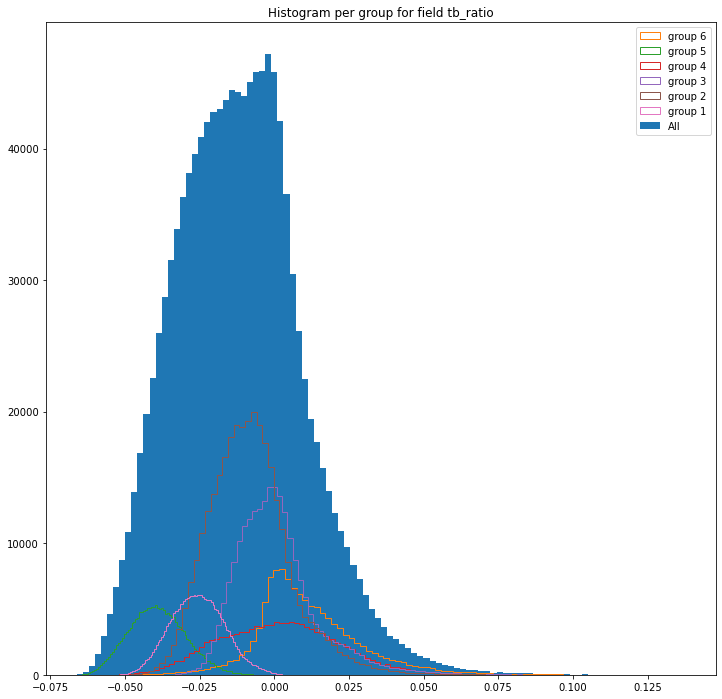

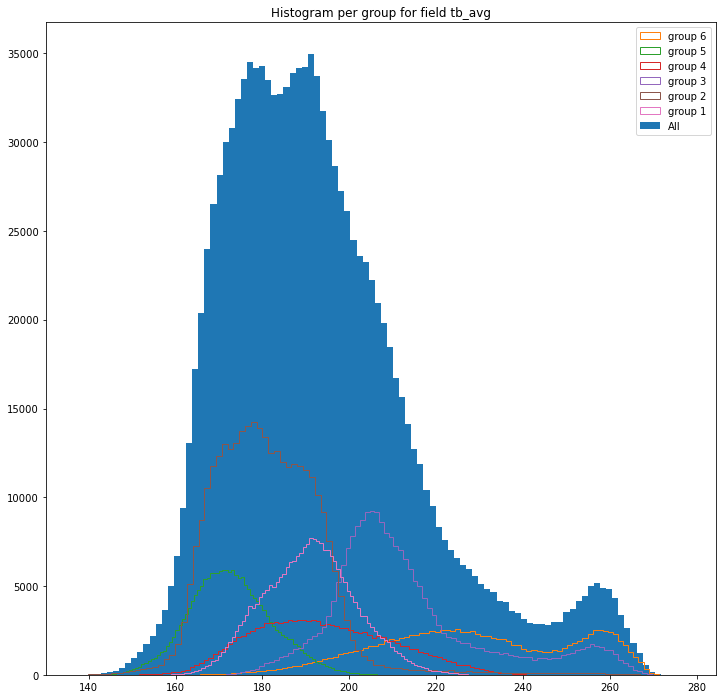

In [20]:
histbygroup("tb_ratio", df, grouped_by_class)
histbygroup("tb_avg", df, grouped_by_class)

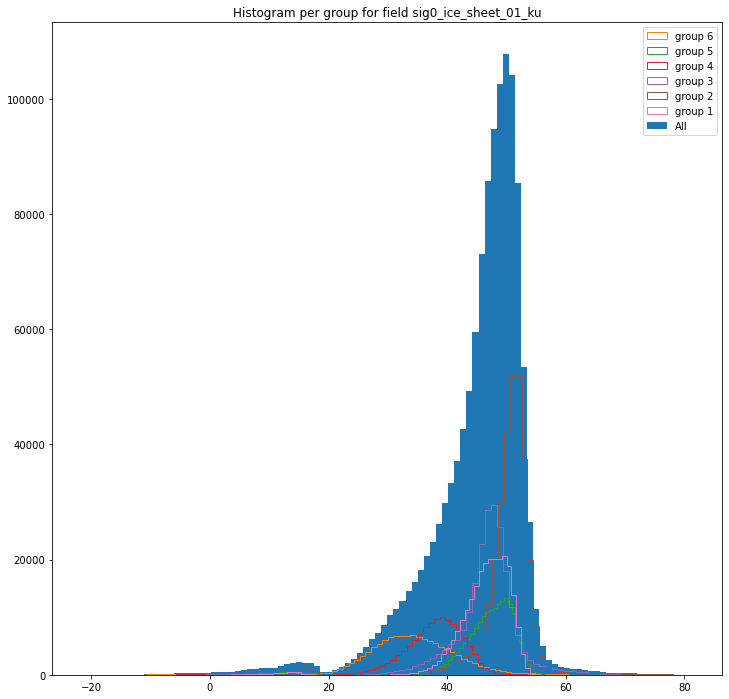

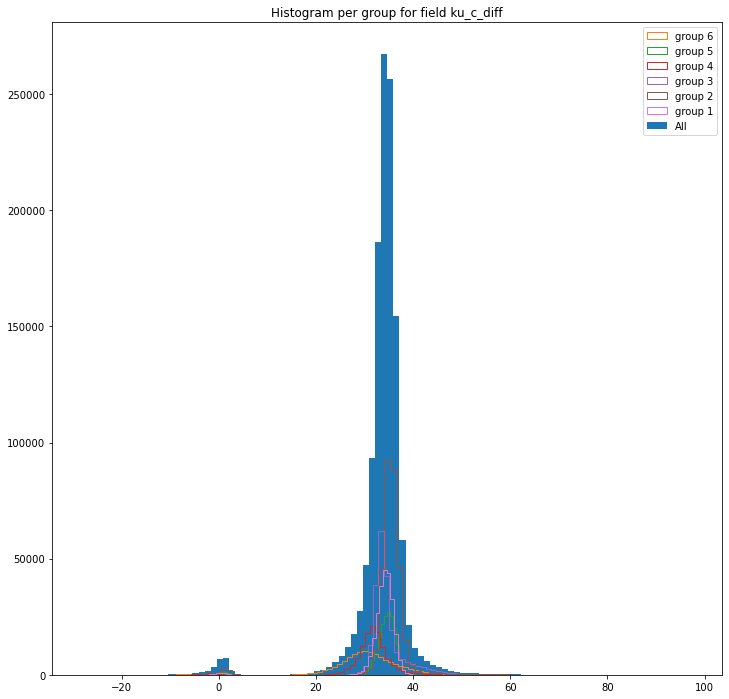

In [21]:
histbygroup("sig0_ice_sheet_01_ku", df, grouped_by_class)
histbygroup("ku_c_diff", df, grouped_by_class)

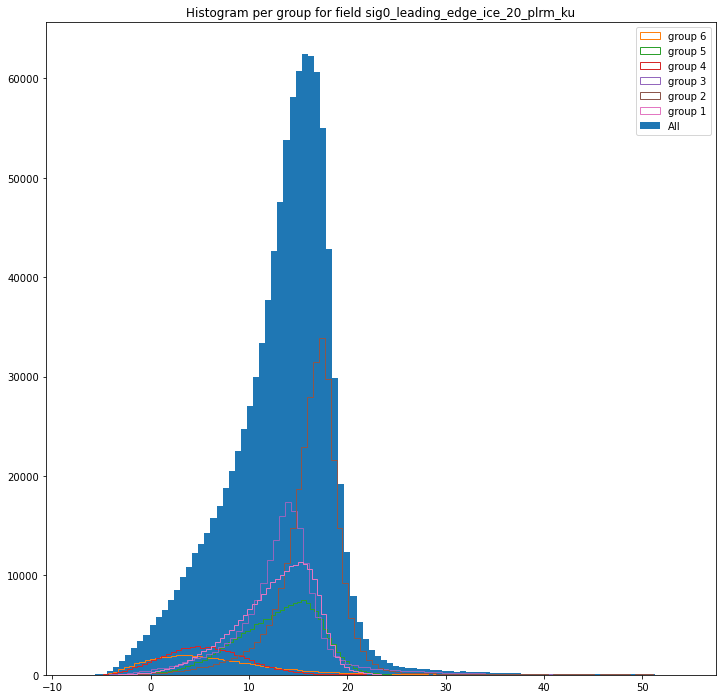

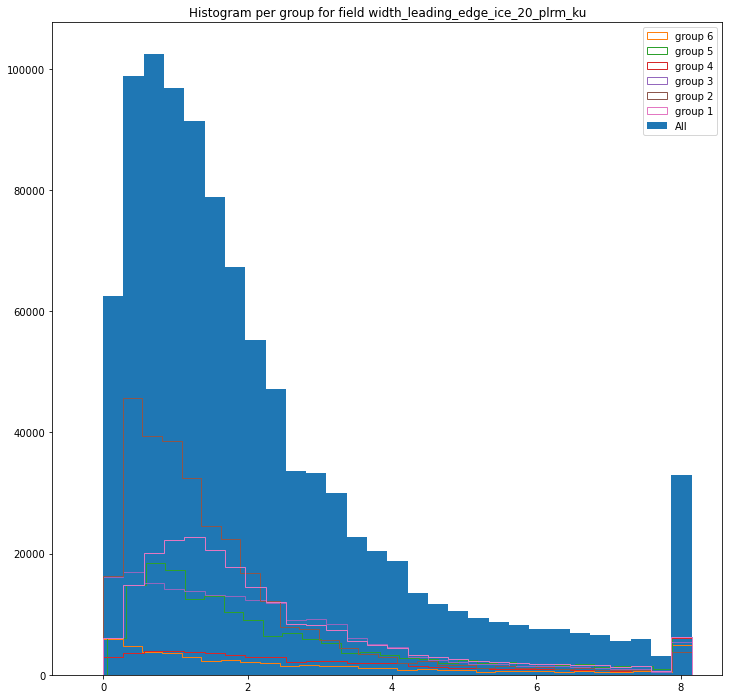

In [22]:
histbygroup("sig0_leading_edge_ice_20_plrm_ku", df, grouped_by_class)
histbygroup("width_leading_edge_ice_20_plrm_ku", df, grouped_by_class, bins=30)

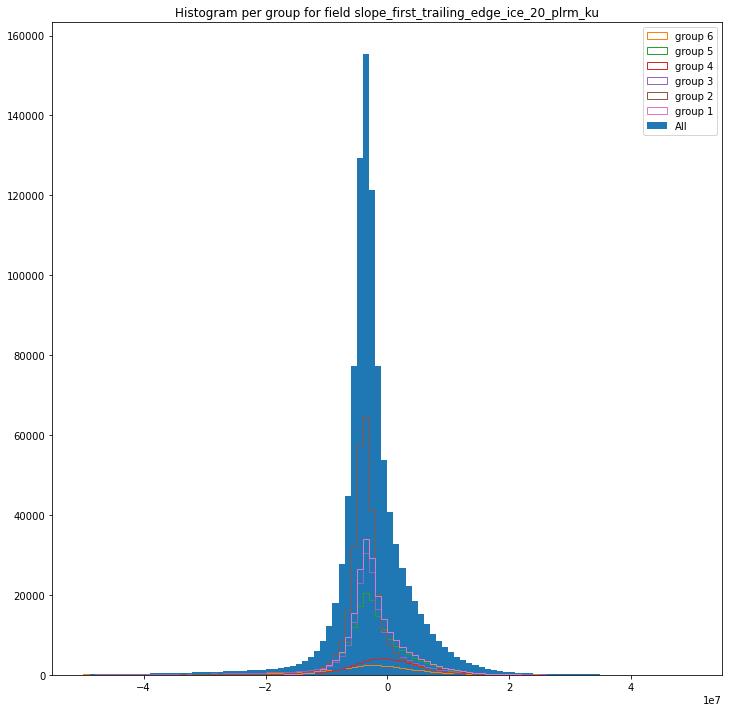

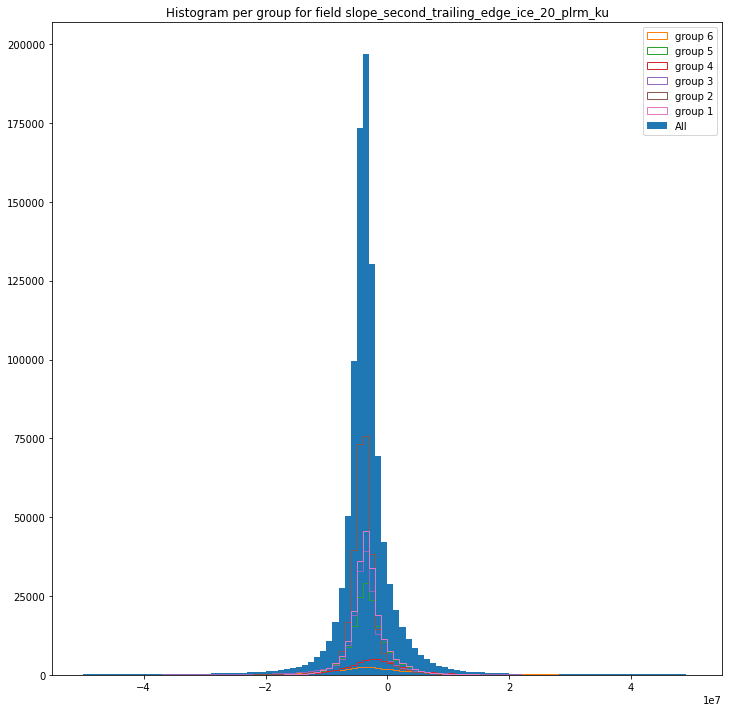

In [23]:
histbygroup("slope_first_trailing_edge_ice_20_plrm_ku", df, grouped_by_class, range=(-5e7, 5e7))
histbygroup("slope_second_trailing_edge_ice_20_plrm_ku", df, grouped_by_class, range=(-5e7, 5e7))

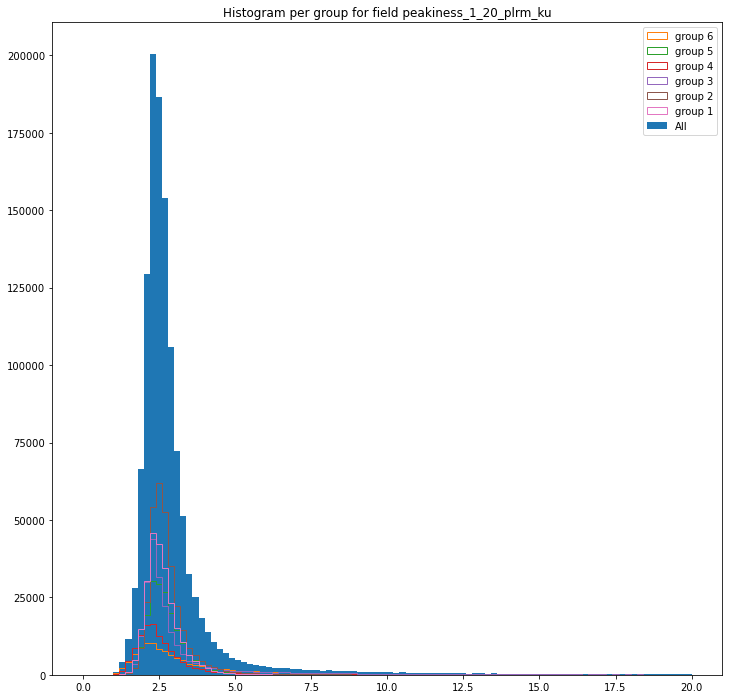

In [24]:
histbygroup("peakiness_1_20_plrm_ku", df, grouped_by_class, range=(0, 20))

### Geographic plots



Geographic repartition of the classes.

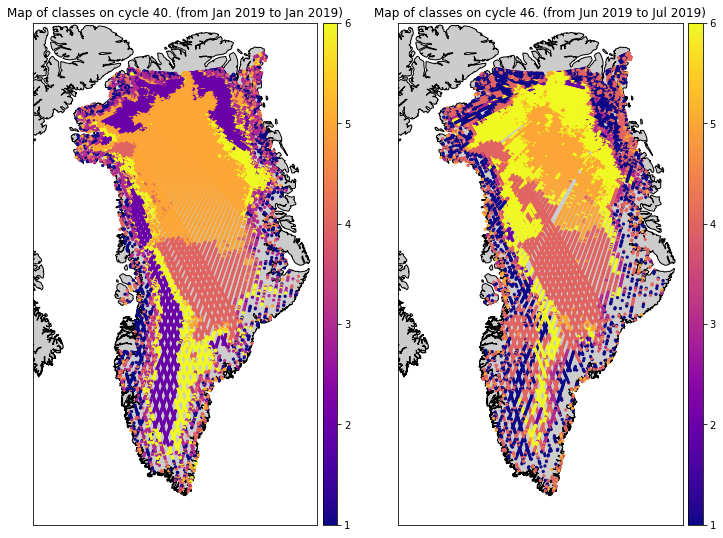

In [25]:
def drawClasses(cycle):
    plt.title("Map of classes on cycle %d. (from %s to %s)" % (
        cycle,
        toolbox.ESA_time_to_datetime(df[df["cycle"] == cycle]["time_01"].min()).strftime("%b %Y"),
        toolbox.ESA_time_to_datetime(df[df["cycle"] == cycle]["time_01"].max()).strftime("%b %Y")
    ))
    toolbox.drawGreenland(df[df["cycle"] == cycle], "lon_01", "lat_01", "ice_sheet_snow_facies_flag_01_ku")

plt.figure(figsize=(12, 20))
plt.subplot(1, 2, 1)
drawClasses(40)
plt.subplot(1, 2, 2)
drawClasses(46)
plt.show()

Geographic representation of the parameters.

In [26]:
fields_of_interest = [
    "tb_ratio", "tb_avg", "sig0_ice_sheet_01_ku", "ku_c_diff",
    "sig0_leading_edge_ice_20_plrm_ku", "width_leading_edge_ice_20_plrm_ku",
    "slope_first_trailing_edge_ice_20_plrm_ku", "slope_second_trailing_edge_ice_20_plrm_ku",
    "peakiness_1_20_plrm_ku"
]

def drawParameters(cycle):
    plt.figure(figsize=(16, 20))
    plt.suptitle("Map of parameters on cycle %d. (from %s to %s)" % (
        cycle,
        toolbox.ESA_time_to_datetime(df[df["cycle"] == cycle]["time_01"].min()).strftime("%b %Y"),
        toolbox.ESA_time_to_datetime(df[df["cycle"] == cycle]["time_01"].max()).strftime("%b %Y")
    ))
    for i, field in enumerate(fields_of_interest):
        plt.subplot(3, 3, i + 1)
        plt.title(field)
        toolbox.drawGreenland(df[df["cycle"] == cycle], "lon_01", "lat_01", field)
    plt.show()

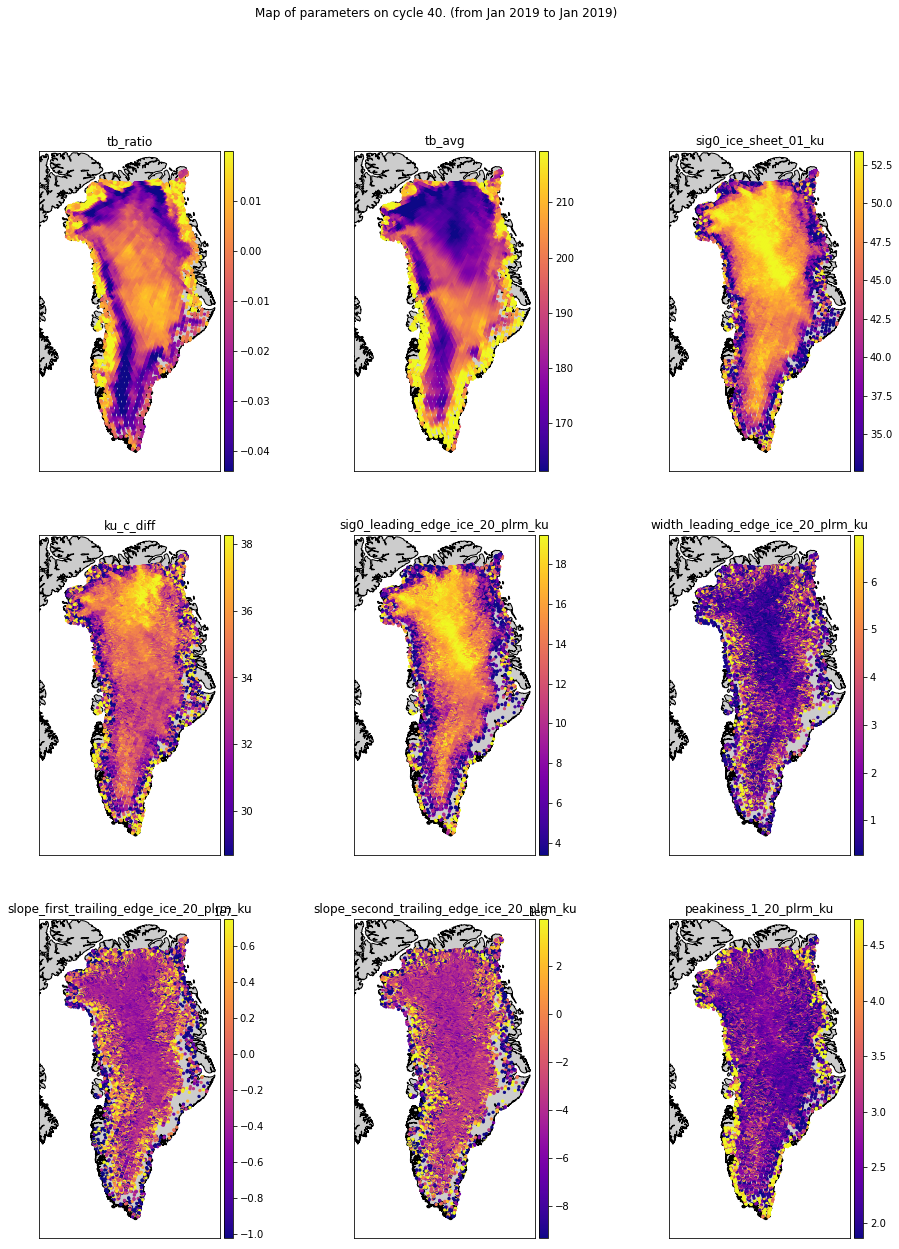

In [27]:
drawParameters(40)

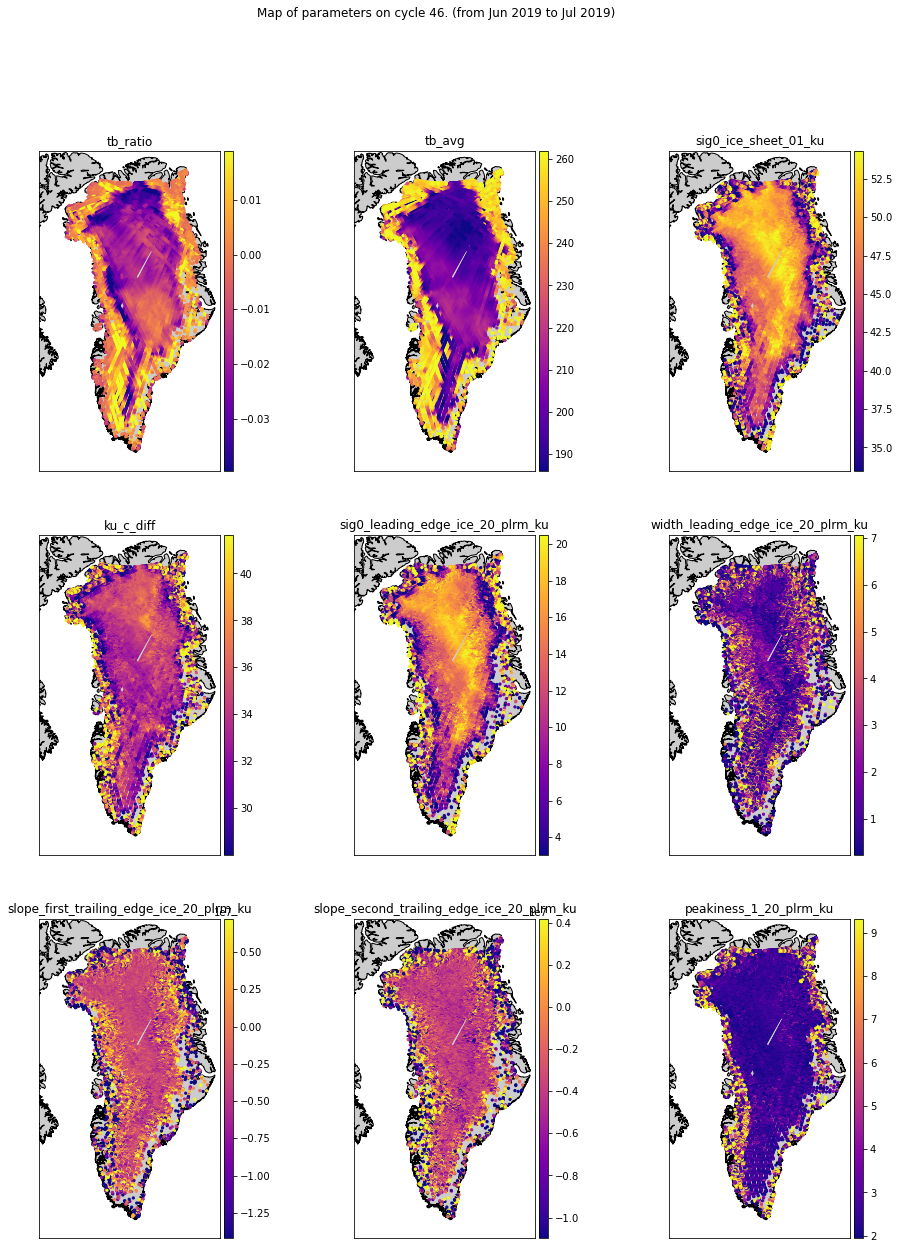

In [28]:
drawParameters(46)

### Correlation between parameters

The map shows that *slope_first_trailing_edge_ice_20_plrm_ku* and *slope_second_trailing_edge_ice_20_plrm_ku* seemed to be correlated, as well as *sig0_leading_edge_ice_20_plrm_ku* and *sig0_ice_sheet_01_ku*, which is unsuprising since they are actually very similar metrics.

Let's see how correlated they are.

In [29]:
print(df[["slope_first_trailing_edge_ice_20_plrm_ku", "slope_second_trailing_edge_ice_20_plrm_ku"]].corr())

                                           slope_first_trailing_edge_ice_20_plrm_ku  \
slope_first_trailing_edge_ice_20_plrm_ku                                   1.000000   
slope_second_trailing_edge_ice_20_plrm_ku                                 -0.053995   

                                           slope_second_trailing_edge_ice_20_plrm_ku  
slope_first_trailing_edge_ice_20_plrm_ku                                   -0.053995  
slope_second_trailing_edge_ice_20_plrm_ku                                   1.000000  


The trailing slopes are not actually correlated.

In [30]:
print(df[["sig0_leading_edge_ice_20_plrm_ku", "sig0_ice_sheet_01_ku"]].corr())

                                  sig0_leading_edge_ice_20_plrm_ku  \
sig0_leading_edge_ice_20_plrm_ku                          1.000000   
sig0_ice_sheet_01_ku                                      0.842517   

                                  sig0_ice_sheet_01_ku  
sig0_leading_edge_ice_20_plrm_ku              0.842517  
sig0_ice_sheet_01_ku                          1.000000  


But the sig0 are.

Finally the full correlation matrix.

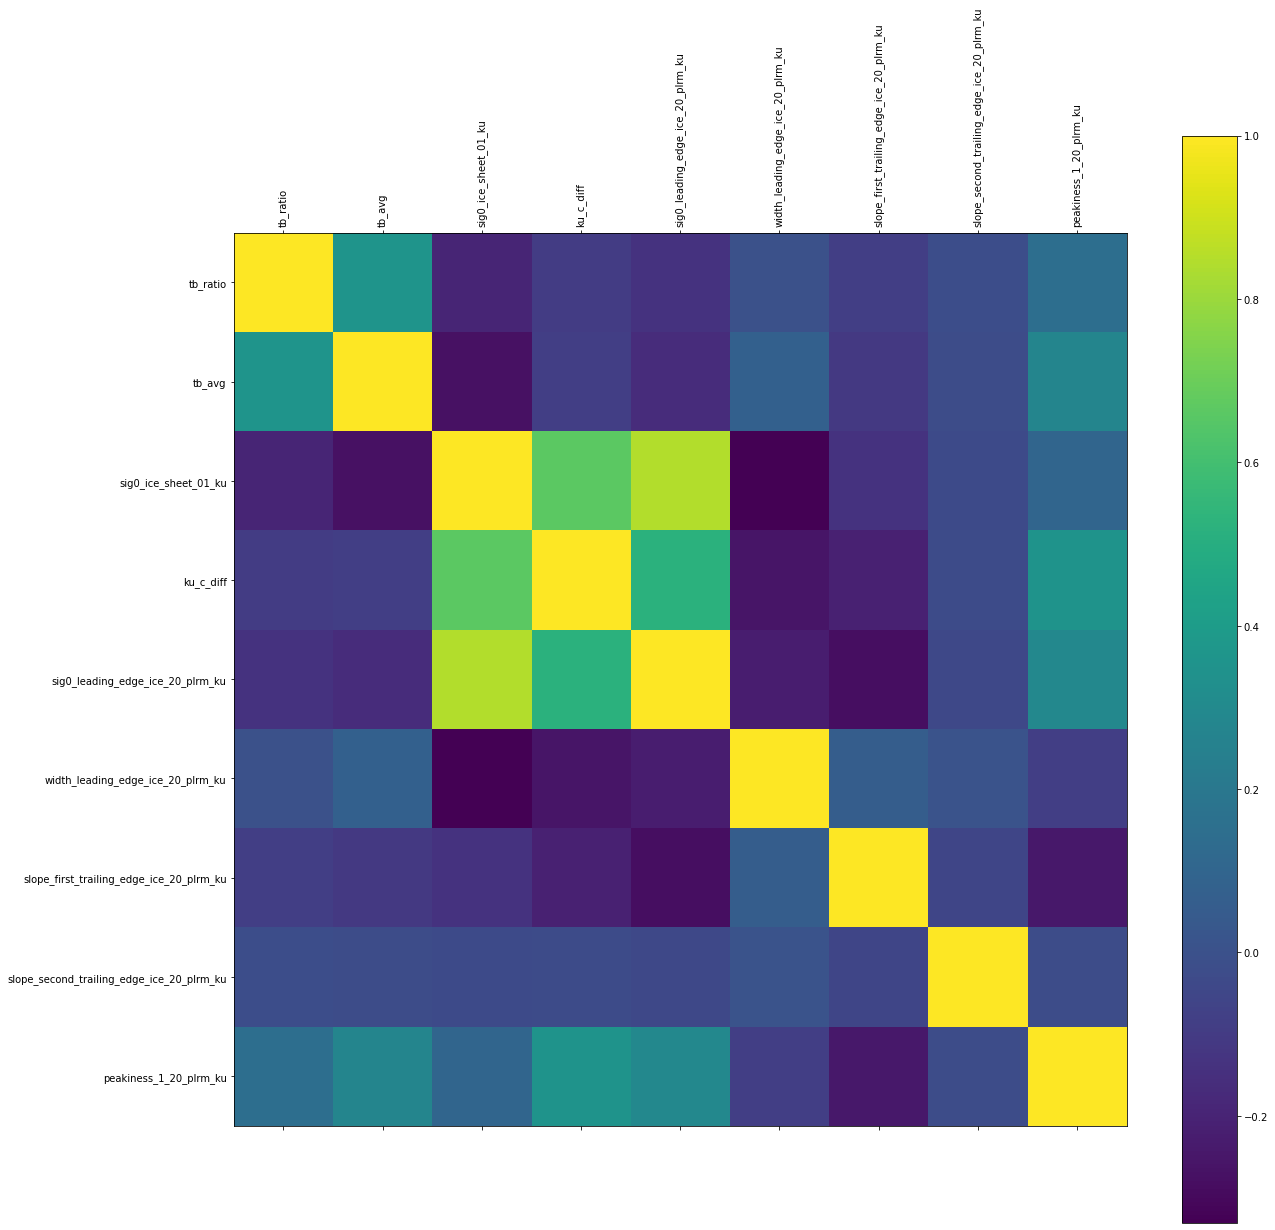

In [31]:
fields_of_interest = [
    "tb_ratio", "tb_avg", "sig0_ice_sheet_01_ku", "ku_c_diff", "sig0_leading_edge_ice_20_plrm_ku",
    "width_leading_edge_ice_20_plrm_ku", "slope_first_trailing_edge_ice_20_plrm_ku",
    "slope_second_trailing_edge_ice_20_plrm_ku", "peakiness_1_20_plrm_ku"
]

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
cax = ax.matshow(df[fields_of_interest].dropna().corr())
fig.colorbar(cax)

ax.set_xticklabels(['']+fields_of_interest, rotation=90)
ax.set_yticklabels(['']+fields_of_interest)
plt.show()